#**Oasis Infobyte : Data Science Internship**#

**Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING**

**Name of Intern : Vibhav Gupta**

**Batch - April Phase 2 OIBSIP**

#**Step 1: Import Libraries**#

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/content/drive/MyDrive/car_ID,symboling,CarName,fueltype,a.csv')

In [8]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,2.68,9,111.0,5000.0,21,27,13495.0,NaN,NaN,NaN
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,2.68,9,111.0,5000.0,21,27,16500.0,NaN,NaN,NaN
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,3.47,9,154.0,5000.0,19,26,16500.0,NaN,NaN,NaN
3,4,2,audi,100,ls,gas,std,four,sedan,fwd,...,3.19,3.4,10.0,102.0,5500,24,30.0,13950.0,NaN,NaN
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,3.4,8,115.0,5500.0,18,22,17450.0,NaN,NaN,NaN


In [9]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,...,2.68,9,111.0,5000.0,21,27,13495.0,NaN,NaN,NaN
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,...,2.68,9,111.0,5000.0,21,27,16500.0,NaN,NaN,NaN
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,...,3.47,9,154.0,5000.0,19,26,16500.0,NaN,NaN,NaN
3,4,2,audi,100,ls,gas,std,four,sedan,fwd,...,3.19,3.4,10.0,102.0,5500,24,30.0,13950.0,NaN,NaN
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,...,3.4,8,115.0,5500.0,18,22,17450.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,145e,(sw),gas,std,four,sedan,rwd,...,3.78,3.15,9.5,114.0,5400,23,28.0,16845.0,NaN,NaN
201,202,-1,volvo,144ea,gas,turbo,four,sedan,rwd,front,...,3.15,8.7,160.0,5300.0,19,25,19045.0,NaN,NaN,NaN
202,203,-1,volvo,244dl,gas,std,four,sedan,rwd,front,...,2.87,8.8,134.0,5500.0,18,23,21485.0,NaN,NaN,NaN
203,204,-1,volvo,246,diesel,turbo,four,sedan,rwd,front,...,3.4,23,106.0,4800.0,26,27,22470.0,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    object 
 10  carlength         205 non-null    object 
 11  carwidth          205 non-null    object 
 12  carheight         205 non-null    object 
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    object 
 1

In [11]:
df.isnull().sum()

car_ID                0
symboling             0
CarName               0
fueltype              0
aspiration            0
doornumber            0
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber        0
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
Unnamed: 26           2
Unnamed: 27         140
Unnamed: 28         191
Unnamed: 29         204
dtype: int64

In [12]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [13]:
df['price'].describe()

count     205.000000
mean      408.785366
std      1368.936077
min        14.000000
25%        25.000000
50%        30.000000
75%        34.000000
max      7126.000000
Name: price, dtype: float64

<ipython-input-14-594846cc3063>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Kurtosis: 10.560992
Skewness: 3.461972


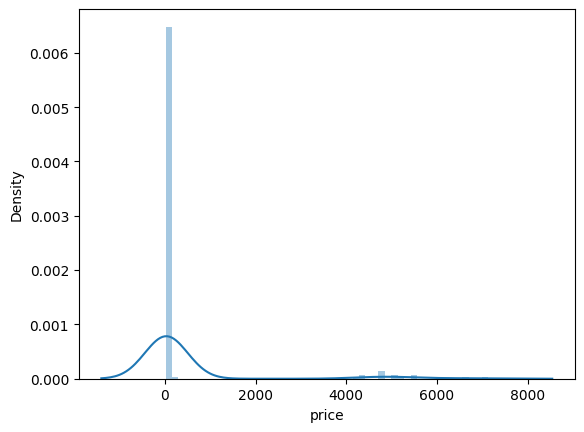

In [14]:
sns.distplot(df['price'])
print("Kurtosis: %f" % df['price'].kurt())
print("Skewness: %f" % df['price'].skew())

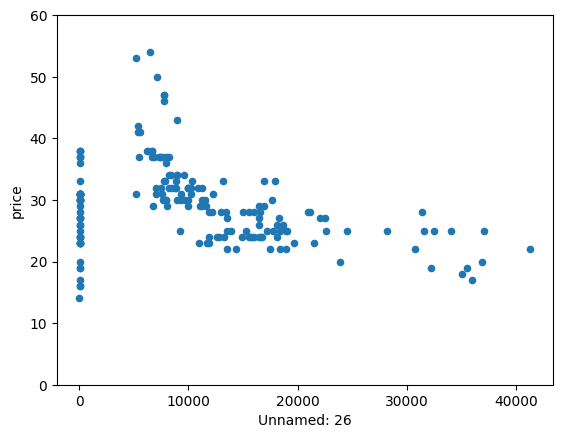

In [19]:
attrib = 'Unnamed: 26'
data = pd.concat([df['price'], df[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,60));

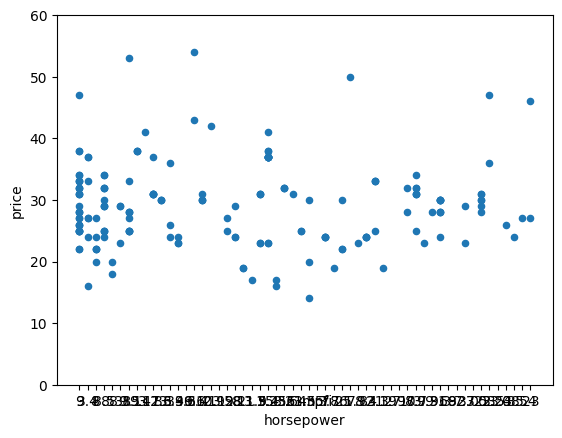

In [25]:
attrib = 'horsepower'
data = pd.concat([df['price'], df[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,60));

<ipython-input-26-2f1e444890dc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


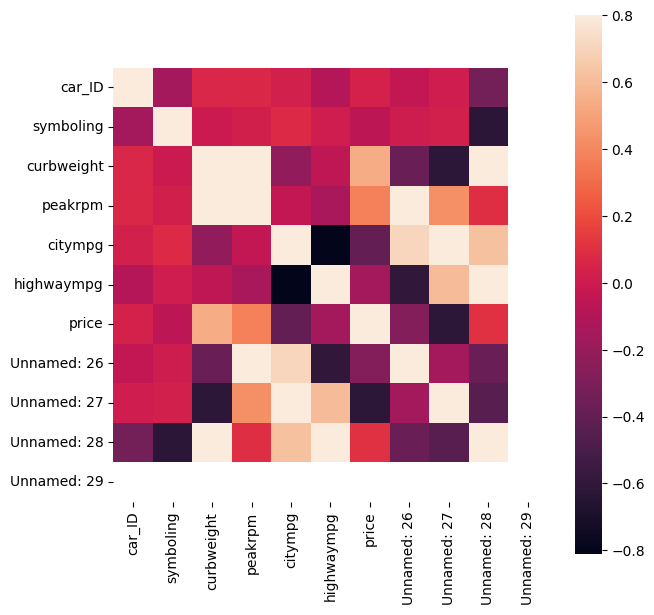

In [26]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

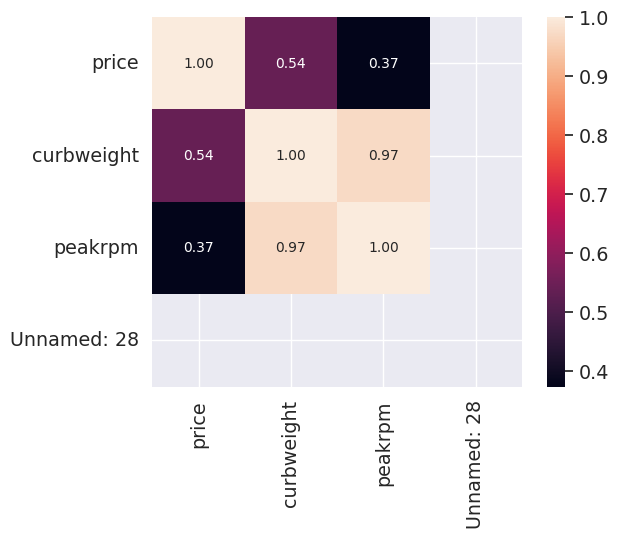

In [29]:
k = 4
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#**Thankyou**#